<a href="https://colab.research.google.com/github/prasq/Django_proj/blob/master/UAS_FACTOR_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.bold text

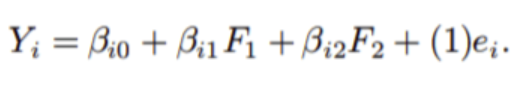

In [ ]:
#!pip install factor_analyzer

#pip install factor_analyzer==0.2.3

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
path = r"/content/test_0.1.xlsx"
df = pd.read_excel(path)
df

In [5]:
df.columns

Index(['Anxious - Relaxed', 'Agitated- Calm',
       'Quiescent (Unsurprised)-Surprised'],
      dtype='object')

In [6]:
#df.drop(['gender', 'education', 'age'],axis=1,inplace=True)
#df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Anxious - Relaxed                  26 non-null     int64
 1   Agitated- Calm                     26 non-null     int64
 2   Quiescent (Unsurprised)-Surprised  26 non-null     int64
dtypes: int64(3)
memory usage: 752.0 bytes


In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(29.64850689452839, 7.921729504230312e-07)

In [8]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [9]:
kmo_model
# KMO < 0.6 considered inadequate. 

0.5398310211237656

Choosing the Number of Factors


In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(df)
#loadings = fa.loadings
#fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.11097581, 0.66678206, 0.22224213])

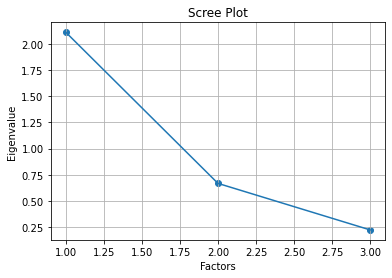

In [13]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [16]:
fa.loadings_

array([[ 0.7096471 ,  0.65902642,  0.        ],
       [ 0.76394903,  0.24312463,  0.        ],
       [-0.22800877, -0.67430301,  0.        ]])

In [17]:
# Get variance of each factors
fa.get_factor_variance()

(array([1.13920513, 0.94810997, 0.        ]),
 array([0.37973504, 0.31603666, 0.        ]),
 array([0.37973504, 0.6957717 , 0.6957717 ]))